#Chữ số 0 - 9 (Test, CNN)

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Tải dữ liệu
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tiền xử lý dữ liệu
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Chuyển đổi nhãn thành định dạng one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Tạo mô hình CNN
model = Sequential()

# Thêm các lớp Convolutional và MaxPooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))

# Chuyển đổi đầu ra của các lớp convolutional thành vector 1 chiều
model.add(Flatten())

# Thêm các lớp fully connected
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Huấn luyện mô hình
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 52s 59ms/step - accuracy: 0.8685 - loss: 0.4083 - val_accuracy: 0.9838 - val_loss: 0.0570
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 59ms/step - accuracy: 0.9845 - loss: 0.0501 - val_accuracy: 0.9837 - val_loss: 0.0545
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 60ms/step - accuracy: 0.9896 - loss: 0.0336 - val_accuracy: 0.9863 - val_loss: 0.0443
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 58ms/step - accuracy: 0.9916 - loss: 0.0243 - val_accuracy: 0.9920 - val_loss: 0.0285
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 60ms/step - accuracy: 0.9942 - loss: 0.0182 - val_accuracy: 0.9917 - val_loss: 0.0325


In [ ]:
# Hàm dự đoán
def predict_digit(image):
    image = image.reshape(1, 28, 28, 1)  # Thay đổi kích thước để phù hợp với đầu vào của mô hình
    image = image.astype('float32') / 255.0
    prediction = model.predict(image)
    predicted_digit = np.argmax(prediction)
    return predicted_digit

In [ ]:
# Lưu mô hình
model.save('Model_Handwriting.h5')

# Tải mô hình
loaded_model = tf.keras.models.load_model('Model_Handwriting.h5')


#Chữ Cái 0 - 1 - A - Z (CNN) 28x28

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install emnist

In [ ]:
import numpy as np
import emnist
import gzip
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models


# Đọc dữ liệu EMNIST byclass

def load_emnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        # Đọc header
        f.read(16)
        # Đọc dữ liệu ảnh
        data = np.frombuffer(f.read(), dtype=np.uint8)
        return data.reshape(-1, 28, 28)  # Thay đổi kích thước để phù hợp với ảnh 28x28

def load_emnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        # Đọc header
        f.read(8)
        # Đọc dữ liệu nhãn
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

train_images = load_emnist_images('/content/drive/MyDrive/Colab Notebooks/Data /Data_HM&UD/gzip/emnist-byclass-train-images-idx3-ubyte.gz')
train_labels = load_emnist_labels('/content/drive/MyDrive/Colab Notebooks/Data /Data_HM&UD/gzip/emnist-byclass-train-labels-idx1-ubyte.gz')

Tiền xử lý dữ liệu hình ảnh

In [ ]:
# Tiền xử lý dữ liệu hình ảnh
train_images = train_images / 255.0

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập xác thực
X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

In [ ]:
# Chuyển đổi nhãn thành one-hot encoding với số lớp là 62
y_train = to_categorical(y_train, num_classes=62)
y_val = to_categorical(y_val, num_classes=62)

In [ ]:
# Mô hình CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(62, activation='softmax')
])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])



Huấn luyện mô hình

In [ ]:
# Early stopping là một cách hiệu quả để xác định số lượng epoch tối ưu mà không cần phải dự đoán trước:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/10
17449/17449 [==============================] - 150s 9ms/step - loss: 0.8082 - accuracy: 0.7534 - val_loss: 0.5081 - val_accuracy: 0.8260
Epoch 2/10
17449/17449 [==============================] - 147s 8ms/step - loss: 0.4759 - accuracy: 0.8337 - val_loss: 0.4871 - val_accuracy: 0.8290
Epoch 3/10
17449/17449 [==============================] - 148s 8ms/step - loss: 0.4360 - accuracy: 0.8446 - val_loss: 0.4385 - val_accuracy: 0.8461
Epoch 4/10
17449/17449 [==============================] - 147s 8ms/step - loss: 0.4151 - accuracy: 0.8505 - val_loss: 0.4151 - val_accuracy: 0.8520
Epoch 5/10
17449/17449 [==============================] - 148s 8ms/step - loss: 0.4013 - accuracy: 0.8545 - val_loss: 0.4027 - val_accuracy: 0.8555
Epoch 6/10
17449/17449 [==============================] - 146s 8ms/step - loss: 0.3915 - accuracy: 0.8573 - val_loss: 0.4009 - val_accuracy: 0.8546
Epoch 7/10
17449/17449 [==============================] - 145s 8ms/step - loss: 0.3835 - accuracy: 0.8593 - val_

Đánh Giá Mô Hình

In [ ]:
# Đọc dữ liệu kiểm tra
test_images = load_emnist_images('/content/drive/MyDrive/Colab Notebooks/Data /Data_HM&UD/gzip/emnist-byclass-test-images-idx3-ubyte.gz')
test_labels = load_emnist_labels('/content/drive/MyDrive/Colab Notebooks/Data /Data_HM&UD/gzip/emnist-byclass-test-labels-idx1-ubyte.gz')

test_images = test_images / 255.0
test_labels = to_categorical(test_labels, num_classes=62)

# Đánh giá mô hình
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


3636/3636 [==============================] - 12s 3ms/step - loss: 0.3797 - accuracy: 0.8605
Test accuracy: 0.8605434894561768


Dự Đoán Với Mô Hình

In [ ]:
# Dự đoán
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


3636/3636 [==============================] - 12s 3ms/step


Lưu Mô Hình

In [ ]:
# Lưu mô hình
model.save('/content/drive/MyDrive/Colab Notebooks/Model/CNN_Handwriting_v2.1_28x28.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Model/CNN_Handwriting_v2.1_28x28.h5')

 Trực Quan Hóa Kết Quả

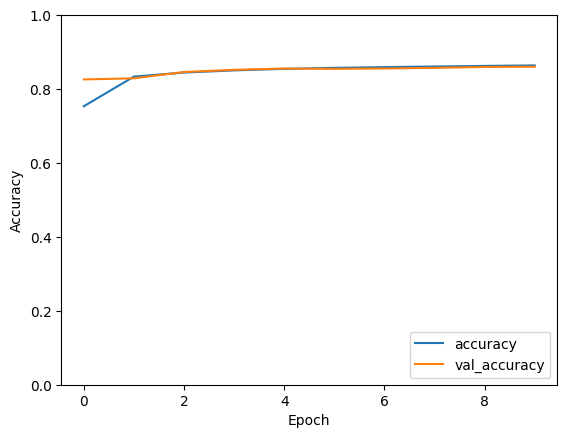

In [ ]:
import matplotlib.pyplot as plt

# Vẽ đồ thị lỗi huấn luyện và xác thực
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


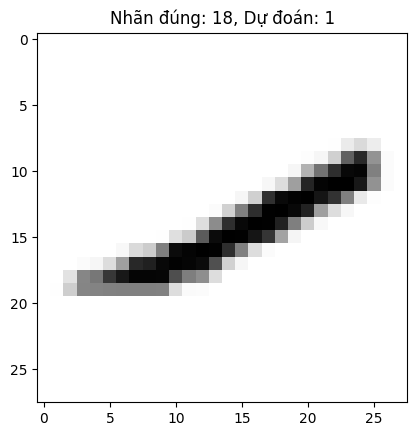

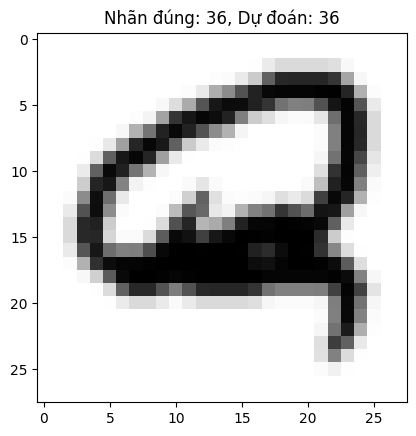

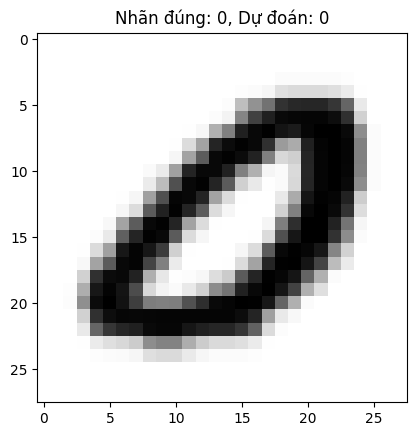

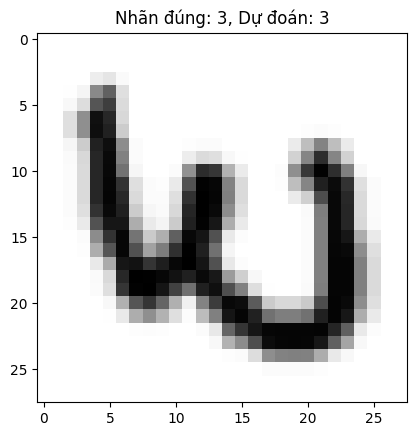

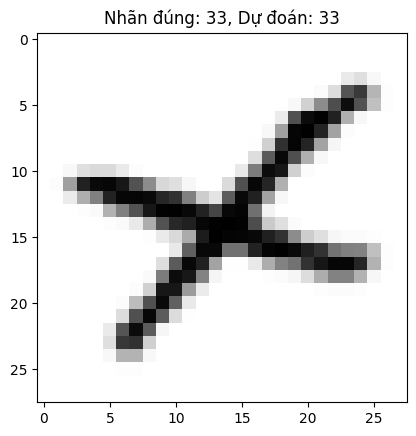

In [ ]:
def plot_image(image, label, prediction):
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title(f'Nhãn đúng: {label}, Dự đoán: {prediction}')
    plt.show()

# Hiển thị các dự đoán mẫu
for i in range(5):
    plot_image(test_images[i], np.argmax(test_labels[i]), predicted_labels[i])


# Chữ Cái 0 - 1 - A - Z (CNN) 128x128

In [ ]:
# Đọc dữ liệu EMNIST byclass

def load_emnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        f.read(16)
        data = np.frombuffer(f.read(), dtype=np.uint8)
        data = data.reshape(-1, 28, 28)  # Kích thước ban đầu 28x28
        data = np.expand_dims(data, axis=-1)
        data_resized = np.zeros((data.shape[0], 128, 128, 1))

        for i in range(data.shape[0]):
            data_resized[i] = tf.image.resize(data[i], (128, 128))  # Resize mỗi ảnh lên 128x128

        return data_resized

def load_emnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        f.read(8)
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

# Đường dẫn đến dữ liệu EMNIST byclass
train_images = load_emnist_images('/content/drive/MyDrive/Colab Notebooks/Data /Data_HM&UD/gzip/emnist-byclass-train-images-idx3-ubyte.gz')
train_labels = load_emnist_labels('/content/drive/MyDrive/Colab Notebooks/Data /Data_HM&UD/gzip/emnist-byclass-train-labels-idx1-ubyte.gz')

In [ ]:
# Tiền xử lý dữ liệu hình ảnh
train_images = train_images / 255.0

# Chia dữ liệu thành tập huấn luyện và tập xác thực
X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

# Chuyển đổi nhãn thành one-hot encoding với số lớp là 62
y_train = to_categorical(y_train, num_classes=62)
y_val = to_categorical(y_val, num_classes=62)

In [ ]:
# Mô hình CNN với đầu vào 128x128
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(62, activation='softmax')
])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Sử dụng EarlyStopping để tránh overfitting
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/5
17449/17449 [==============================] - 1574s 90ms/step - loss: 0.7010 - accuracy: 0.7819 - val_loss: 0.4995 - val_accuracy: 0.8292
Epoch 2/5
17449/17449 [==============================] - 1560s 89ms/step - loss: 0.4739 - accuracy: 0.8360 - val_loss: 0.4806 - val_accuracy: 0.8357
Epoch 3/5
17449/17449 [==============================] - 1564s 90ms/step - loss: 0.4360 - accuracy: 0.8468 - val_loss: 0.4567 - val_accuracy: 0.8428
Epoch 4/5
17449/17449 [==============================] - 1560s 89ms/step - loss: 0.4123 - accuracy: 0.8531 - val_loss: 0.4396 - val_accuracy: 0.8458
Epoch 5/5
17449/17449 [==============================] - 1544s 89ms/step - loss: 0.3947 - accuracy: 0.8574 - val_loss: 0.4239 - val_accuracy: 0.8505


In [ ]:
# Đọc dữ liệu kiểm tra và resize ảnh
test_images = load_emnist_images('/content/drive/MyDrive/Colab Notebooks/Data /Data_HM&UD/gzip/emnist-byclass-test-images-idx3-ubyte.gz')
test_labels = load_emnist_labels('/content/drive/MyDrive/Colab Notebooks/Data /Data_HM&UD/gzip/emnist-byclass-test-labels-idx1-ubyte.gz')

test_images = test_images / 255.0
test_labels = to_categorical(test_labels, num_classes=62)

In [ ]:
# Đánh giá mô hình
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Dự đoán
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

3636/3636 [==============================] - 89s 24ms/step - loss: 0.4238 - accuracy: 0.8495
Test accuracy: 0.8495396375656128
3636/3636 [==============================] - 86s 23ms/step


In [ ]:
# Lưu mô hình
model.save('/content/drive/MyDrive/Colab Notebooks/Model/CNN_Handwriting_v2.1_128x128.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Model/CNN_Handwriting_v2.1_128x128.h5')

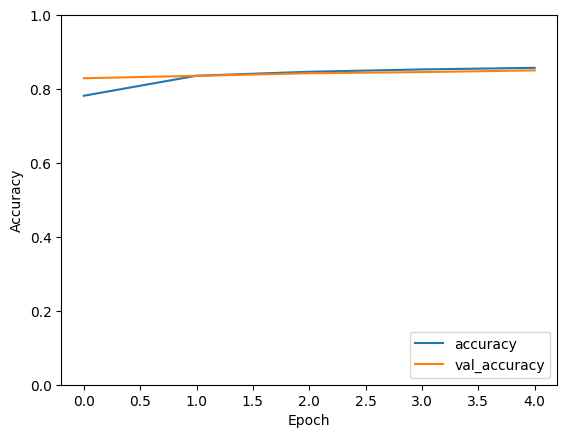

In [ ]:
# Hiển thị kết quả huấn luyện
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

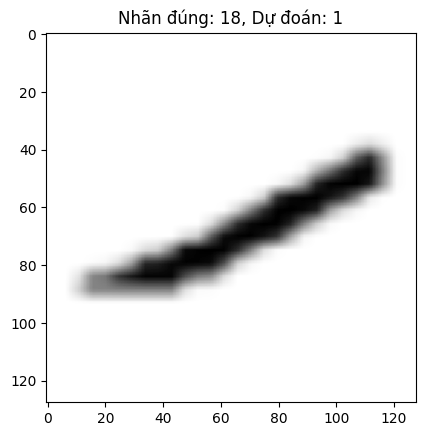

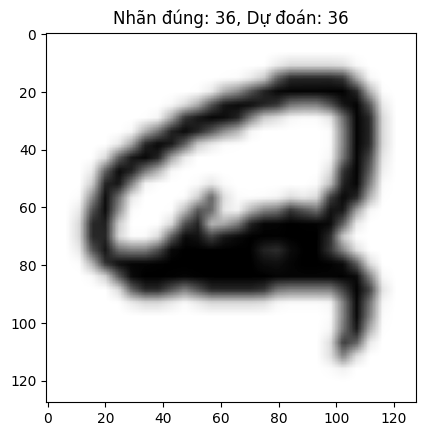

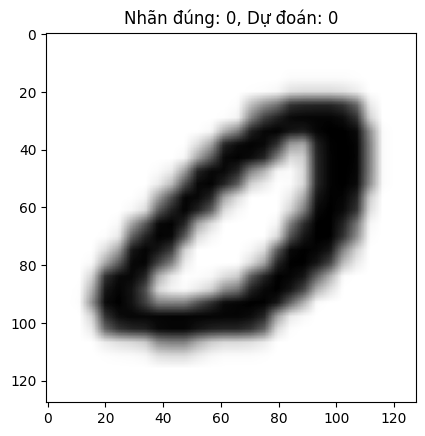

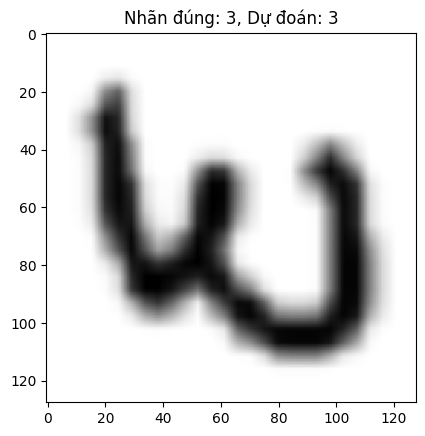

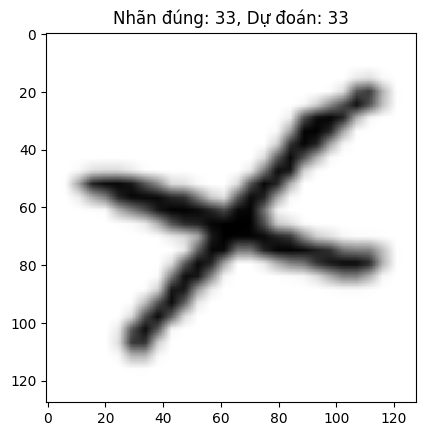

In [ ]:
def plot_image(image, label, prediction):
    plt.imshow(image.squeeze(), cmap=plt.cm.binary)  # Sử dụng squeeze để loại bỏ chiều dư thừa
    plt.title(f'Nhãn đúng: {label}, Dự đoán: {prediction}')
    plt.show()

# Hiển thị các dự đoán mẫu
for i in range(5):
    plot_image(test_images[i], np.argmax(test_labels[i]), predicted_labels[i])

# Output

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from google.colab import files

# Tải model đã huấn luyện
model_28x28 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Model/CNN_Handwriting_v2.1_28x28.h5')
model_128x128 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Model/CNN_Handwriting_v2.1_128x128.h5')

# Ánh xạ các label thành ký tự nhận diện
label_to_char = {
    0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: '0',
    10: 'a', 11: 'b', 12: 'c', 13: 'd', 14: 'e', 15: 'f', 16: 'g', 17: 'h', 18: 'i', 19: 'j',
    20: 'k', 21: 'l', 22: 'm', 23: 'n', 24: 'o', 25: 'p', 26: 'q', 27: 'r', 28: 's', 29: 't',
    30: 'u', 31: 'v', 32: 'w', 33: 'x', 34: 'y', 35: 'z',
    36: 'A', 37: 'B', 38: 'C', 39: 'D', 40: 'E', 41: 'F', 42: 'G', 43: 'H', 44: 'I', 45: 'J',
    46: 'K', 47: 'L', 48: 'M', 49: 'N', 50: 'O', 51: 'P', 52: 'Q', 53: 'R', 54: 'S', 55: 'T',
    56: 'U', 57: 'V', 58: 'W', 59: 'X', 60: 'Y', 61: 'Z'
}

# Hàm để load và tiền xử lý hình ảnh
def preprocess_image(image_path, size):
    # Đọc ảnh ở chế độ grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Resize ảnh về kích thước mong muốn (28x28 hoặc 128x128)
    img = cv2.resize(img, (size, size))
    # Chuẩn hóa giá trị pixel (chuyển giá trị từ 0-255 sang 0-1)
    img = img / 255.0
    # Thêm chiều channel (1 kênh màu cho ảnh grayscale)
    img = np.expand_dims(img, axis=-1)
    # Thêm chiều batch size
    img = np.expand_dims(img, axis=0)

    return img

# Hàm để dự đoán và hiển thị kết quả cho ảnh 28x28
def predict_and_show_28x28(image_path, model):
    img = preprocess_image(image_path, 28)
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction, axis=1)[0]
    predicted_char = label_to_char[predicted_label]
    confidence = np.max(prediction) * 100

    # Hiển thị ảnh và kết quả dự đoán
    original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.figure(figsize=(3, 3))
    plt.imshow(original_img, cmap='gray')
    plt.title('Input:')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    plt.figure(figsize=(3, 3))
    plt.imshow(original_img, cmap='gray')
    plt.title(f'Dự đoán: {predicted_char}, Tỷ lệ: {confidence:.2f}%')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# Hàm để dự đoán và vẽ khung chữ nhật cho ảnh 128x128
def predict_and_draw_128x128(image_path, model):
    img = preprocess_image(image_path, 128)
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction, axis=1)[0]
    predicted_char = label_to_char[predicted_label]
    confidence = np.max(prediction) * 100

    # Hiển thị ảnh và kết quả dự đoán
    original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.figure(figsize=(3, 3))
    plt.imshow(original_img, cmap='gray')
    plt.title('Input:')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

    plt.figure(figsize=(3, 3))
    plt.imshow(original_img, cmap='gray')
    plt.title(f'Dự đoán: {predicted_char}, Tỷ lệ: {confidence:.2f}%')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_128x128.summary()

model_28x28.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       3,211,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 62)                  │           4,030 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,271,104 (12.48 MB)

 Trainable params: 3,271,102 (12.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 62)                  │           4,030 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,704 (377.75 KB)

 Trainable params: 96,702 (377.74 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Upload hình ảnh 28x28 để nhận dạng:


Saving Test1_28x28.png to Test1_28x28 (1).png
Nhận dạng hình ảnh Test1_28x28 (1).png với mô hình 28x28:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


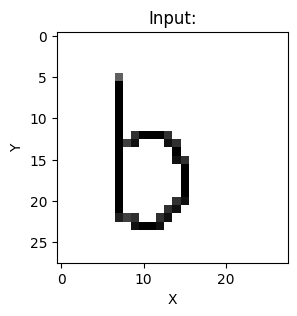

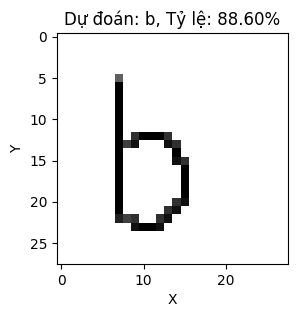

In [ ]:
# Nhận dạng ảnh 28x28
print("Upload hình ảnh 28x28 để nhận dạng:")
uploaded_28x28 = files.upload()

for image_name in uploaded_28x28.keys():
    print(f'Nhận dạng hình ảnh {image_name} với mô hình 28x28:')
    predict_and_show_28x28(image_name, model_28x28)

Upload hình ảnh 128x128 để nhận dạng:


Saving 128x128.png to 128x128 (1).png
Nhận dạng hình ảnh 128x128 (1).png với mô hình 128x128:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


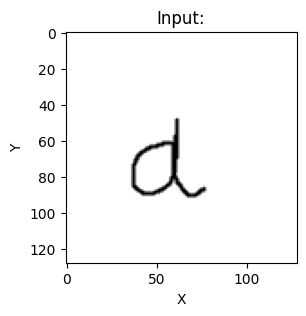

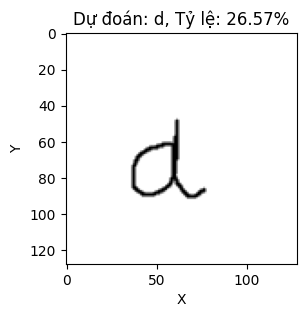

In [ ]:
# Nhận dạng ảnh 128x128
print("Upload hình ảnh 128x128 để nhận dạng:")
uploaded_128x128 = files.upload()

for image_name in uploaded_128x128.keys():
    print(f'Nhận dạng hình ảnh {image_name} với mô hình 128x128:')
    predict_and_draw_128x128(image_name, model_128x128)

#Chữ Cái 0 - 1 - A - Z (KNN)

In [ ]:
# Import thư viện cần thiết
import numpy as np
import emnist
import gzip
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Đọc dữ liệu EMNIST byclass
def load_emnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        # Đọc header
        f.read(16)
        # Đọc dữ liệu ảnh
        data = np.frombuffer(f.read(), dtype=np.uint8)
        return data.reshape(-1, 28, 28)  # Thay đổi kích thước để phù hợp với ảnh 28x28

def load_emnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        # Đọc header
        f.read(8)
        # Đọc dữ liệu nhãn
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

train_images = load_emnist_images('/content/drive/MyDrive/Data Colab/EMNIST/gzip/emnist-byclass-test-images-idx3-ubyte.gz')
train_labels = load_emnist_labels('/content/drive/MyDrive/Data Colab/EMNIST/gzip/emnist-byclass-test-labels-idx1-ubyte.gz')

# Tiền xử lý dữ liệu
train_images = train_images.reshape(-1, 28 * 28) / 255.0

# Chia dữ liệu thành tập huấn luyện và tập xác thực
X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

# Khởi tạo mô hình KNN
k = 5  # Số lượng hàng xóm gần nhất
model = KNeighborsClassifier(n_neighbors=k)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Đánh giá mô hình trên tập xác thực
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy on validation set: {accuracy}')

# Đọc dữ liệu kiểm tra
test_images = load_emnist_images('/content/drive/MyDrive/Data Colab/EMNIST/gzip/emnist-byclass-test-images-idx3-ubyte.gz')
test_labels = load_emnist_labels('/content/drive/MyDrive/Data Colab/EMNIST/gzip/emnist-byclass-test-labels-idx1-ubyte.gz')

# Tiền xử lý dữ liệu kiểm tra
test_images = test_images.reshape(-1, 28 * 28) / 255.0

# Đánh giá mô hình trên tập kiểm tra
y_pred_test = model.predict(test_images)
accuracy_test = accuracy_score(test_labels, y_pred_test)
print(f'Accuracy on test set: {accuracy_test}')


Accuracy on validation set: 0.768622394154309
Accuracy on test set: 0.8188578355097444


In [ ]:
# Lưu mô hình đã huấn luyện
import pickle
filename = '/content/drive/MyDrive/Colab Notebooks/Model/KNN_handwriting_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
import pickle

model_path = '/content/drive/MyDrive/Colab Notebooks/Model/KNN_handwriting_model.sav'

# Mở file và load mô hình sử dụng pickle
with open(model_path, 'rb') as file:
    model = pickle.load(file)


In [ ]:
# Tải lên hình ảnh để dự đoán
from google.colab import files
uploaded = files.upload()

# Chọn hình ảnh đầu tiên từ danh sách tải lên
image_path = next(iter(uploaded))

# Tiền xử lý hình ảnh
img, img_gray = preprocess_image(image_path)



Saving test.png to test (1).png


In [ ]:
# Dự đoán và hiển thị kết quả
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

def preprocess_letter(letter_img):
    # Tiền xử lý chữ cái
    img = Image.fromarray(letter_img).convert('L')
    img = img.resize((28, 28))  # Resize để phù hợp với kích thước đầu vào của mô hình
    img_array = np.array(img) / 255.0  # Chuyển đổi thành mảng numpy và chuẩn hóa
    img_array = img_array.flatten()  # Chuyển đổi thành vector 1 chiều
    return img_array

def predict_letter(letter_img, model):
    img_array = preprocess_letter(letter_img)
    img_array = np.expand_dims(img_array, axis=0)  # Thêm một chiều cho batch
    prediction = model.predict(img_array)
    predicted_label = prediction[0]  # Với KNeighborsClassifier, dự đoán là nhãn trực tiếp
    return predicted_label

def predict_and_visualize(img, crops, model, label_map):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    for crop, (x, y, w, h) in crops:
        predicted_label = predict_letter(crop, model)
        predicted_char = label_map[predicted_label]  # Ánh xạ nhãn thành ký tự tương ứng

        # Vẽ hình chữ nhật quanh khu vực chữ cái và ghi chú
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(img, f'Char: {predicted_char}',
                    (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

# Gọi hàm dự đoán và hiển thị kết quả
predict_and_visualize(img, crops, model, label_map)


Accuracy on test set: 0.8188578355097444


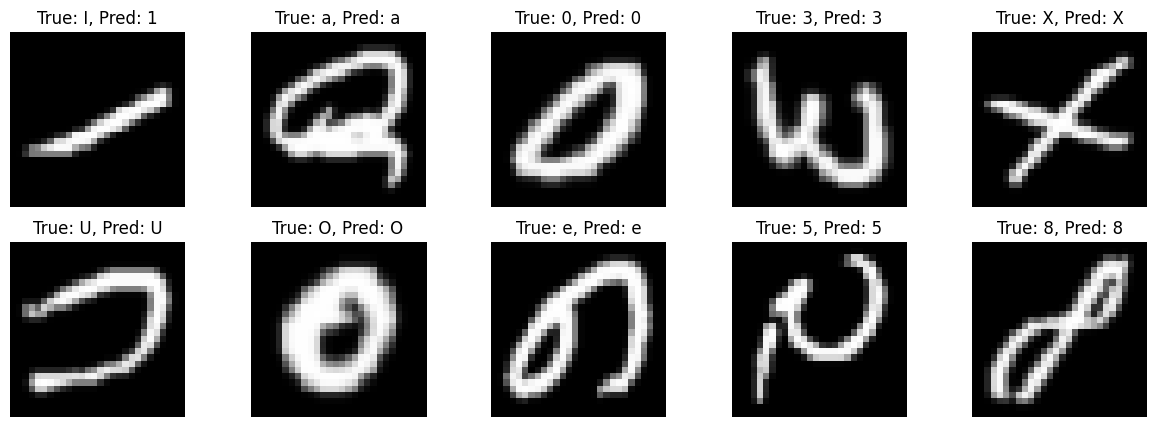

In [ ]:
# Đọc dữ liệu kiểm tra
test_images = load_emnist_images('/content/drive/MyDrive/Data Colab/EMNIST/gzip/emnist-byclass-test-images-idx3-ubyte.gz')
test_labels = load_emnist_labels('/content/drive/MyDrive/Data Colab/EMNIST/gzip/emnist-byclass-test-labels-idx1-ubyte.gz')

# Tiền xử lý dữ liệu kiểm tra
test_images = test_images.reshape(-1, 28 * 28) / 255.0

# Đánh giá mô hình trên tập kiểm tra
y_pred_test = model.predict(test_images)
accuracy_test = accuracy_score(test_labels, y_pred_test)
print(f'Accuracy on test set: {accuracy_test}')

# Trực quan hóa một số dự đoán
num_samples_to_visualize = 10
plt.figure(figsize=(15, 5))
for i in range(num_samples_to_visualize):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {label_map[test_labels[i]]}, Pred: {label_map[y_pred_test[i]]}")
    plt.axis('off')
plt.show()


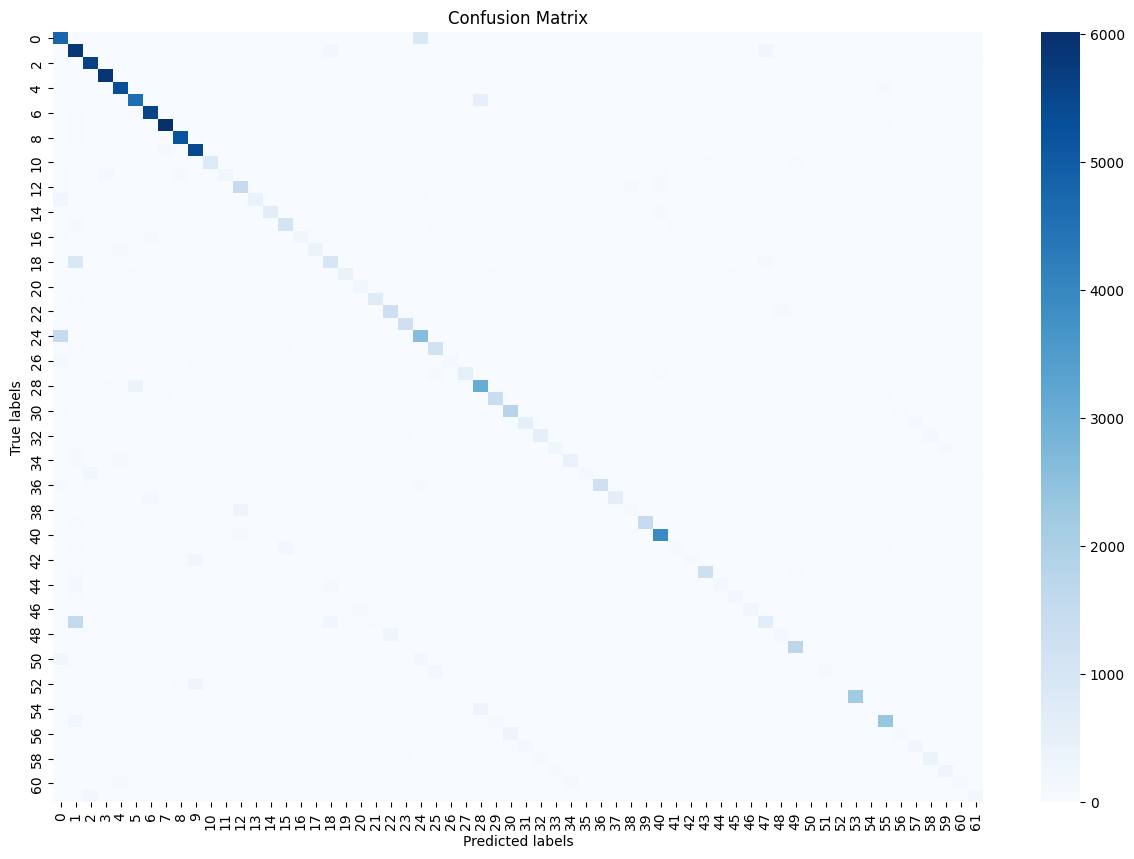

In [ ]:
# Ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_labels, y_pred_test)
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Đánh giá mô hình CNN trên tập kiểm tra
test_loss_cnn, test_acc_cnn = loaded_model.evaluate(test_images.reshape(-1, 28, 28, 1), to_categorical(test_labels, num_classes=62))
print(f'CNN Accuracy on test set: {test_acc_cnn}')

# Đánh giá mô hình KNN trên tập kiểm tra
y_pred_test_knn = model.predict(test_images)
accuracy_test_knn = accuracy_score(test_labels, y_pred_test_knn)
print(f'KNN Accuracy on test set: {accuracy_test_knn}')

# So sánh kết quả
print(f"Độ chính xác CNN cao hơn KNN: {test_acc_cnn > accuracy_test_knn}")
print(f"Chênh lệch độ chính xác: {(test_acc_cnn - accuracy_test_knn)}")

3636/3636 [==============================] - 13s 3ms/step - loss: 0.3876 - accuracy: 0.8572
CNN Accuracy on test set: 0.8571993708610535
KNN Accuracy on test set: 0.8188578355097444
Độ chính xác CNN cao hơn KNN: True
Chênh lệch độ chính xác: 0.03834153535130902
